In [2]:
# IMPORTING THE DATASET
import numpy as np
import pandas as pd

## Obtain the train and test data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [5]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [6]:
# get the lebel and class seperate from the train datset
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [7]:
# get the lebel and class seperate from the train datset
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [8]:
print("X_train and y_train is {}, {}". format(X_train.shape, y_train.shape))
print("X_test and y_test is {}, {}". format(X_test.shape, y_test.shape))

X_train and y_train is (7352, 561), (7352,)
X_test and y_test is (2947, 561), (2947,)


# Let's model our data

## Labels that are useful in plotting confusion matrix

In [9]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Function to plot the confusion matrix

In [10]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# https://chrisalbon.com/code/python/basics/set_the_color_of_a_matplotlib/

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        

# Generic function to run any model specified:

In [11]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, \
                  cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store resutl at various phase
    results = dict()
    
    # time of model start training
    train_start_time = datetime.now()
    print("training the model...")
    model.fit(X_train, y_train)
    print("Done \n \n")
    train_end_time=datetime.now()
    results['training_time'] = train_end_time-train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    # predict test data
    print("Predicting test data")
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print("Done \n \n")
    results['testing_time'] = test_end_time-test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    
    # caculating overall accuracy of the model
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    # store the accuracy
    results['accuracy'] = accuracy
    
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plott confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm,classes=class_labels, normalize=True,cmap=cm_cmap)
    plt.show()
    
    # get the classification reports
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    _classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = _classification_report
    print(_classification_report)
    
    # adding the train model to the result
    results['model'] = model
    return results

# Methods to print the gridSearch attributes:

In [12]:
def print_grid_search_attributes(model):
    print('------------------------------')
    print('|   Best Estimator    |')
    print('------------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))
    
    # parameter that gives best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))
    
    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))
    
    
    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))



# 1. Logistic Regression with Grid Search

In [13]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV


training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:18.905755


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012000


---------------------
|      Accuracy      |
---------------------

    0.9586019681031558


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   1 446]]


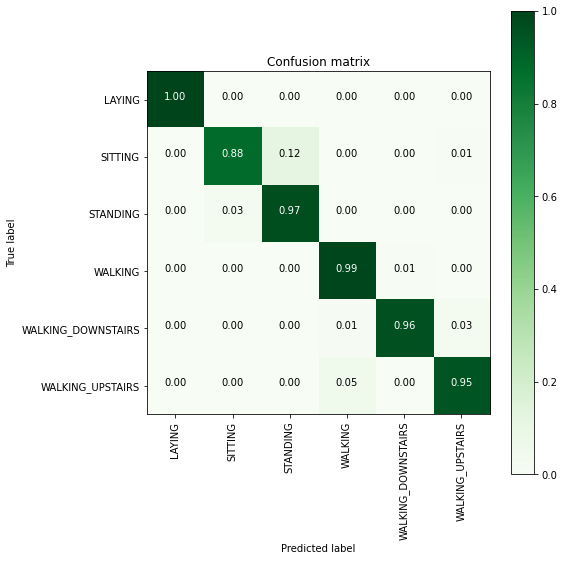

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [14]:
import warnings
warnings.filterwarnings('ignore')

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2', 'l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg,param_grid = parameters, cv=3, verbose=1,n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid, X_train,y_train,X_test, y_test, class_labels=labels)

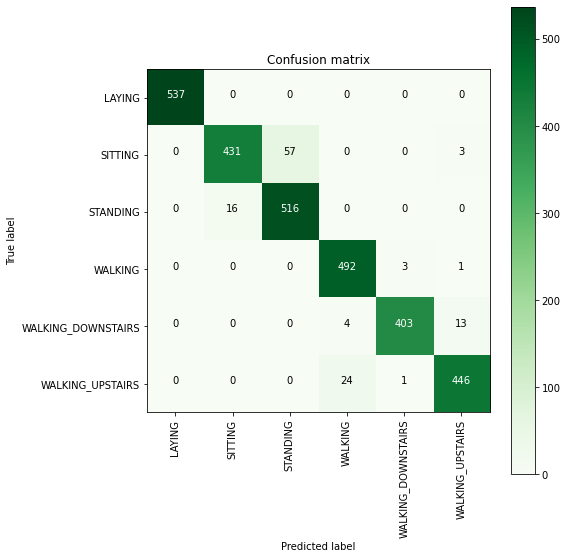

In [15]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [16]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

------------------------------
|   Best Estimator    |
------------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9368895661079609



# 2. Linear SVC with GridSearch

In [17]:
from sklearn.svm import LinearSVC

training the model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:01:12.598058


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.013031


---------------------
|      Accuracy      |
---------------------

    0.9664065151001018


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 427  58   0   0   4]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


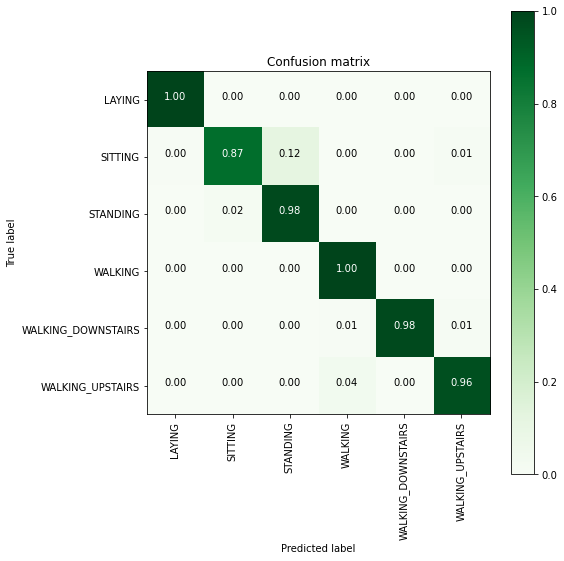

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [18]:
parameters = {'C':[0.125,0.5,1,2,8,16]}
lr_svc = LinearSVC(tol=0.0005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters,n_jobs=-1,verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid,X_train, y_train, X_test, y_test,class_labels=labels)

In [19]:
print_grid_search_attributes(lr_svc_grid_results['model'])

------------------------------
|   Best Estimator    |
------------------------------

	LinearSVC(C=0.5, tol=0.0005)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9420644015594



# 3. Kernel SVM with GridSearch

training the model...
Done 
 

training_time(HH:MM:SS.ms) - 0:02:37.838472


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.988966


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


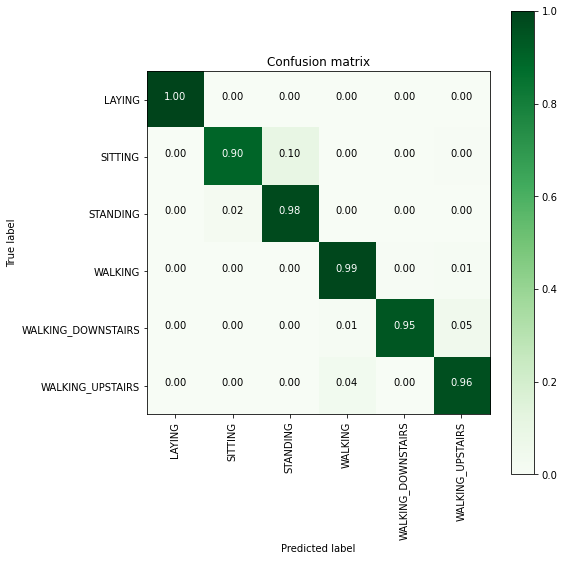

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [20]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [20]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

------------------------------
|   Best Estimator    |
------------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



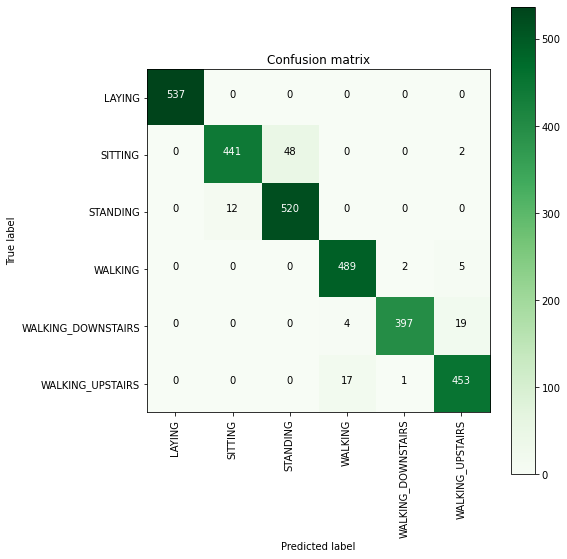

In [21]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

# 4. Decisions Trees with GridSearchCV

training the model...
Done 
 

training_time(HH:MM:SS.ms) - 0:00:23.915326


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011997


---------------------
|      Accuracy      |
---------------------

    0.8778418730912793


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 372 119   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 473  17   6]
 [  0   0   0  24 350  46]
 [  0   0   0  60  29 382]]


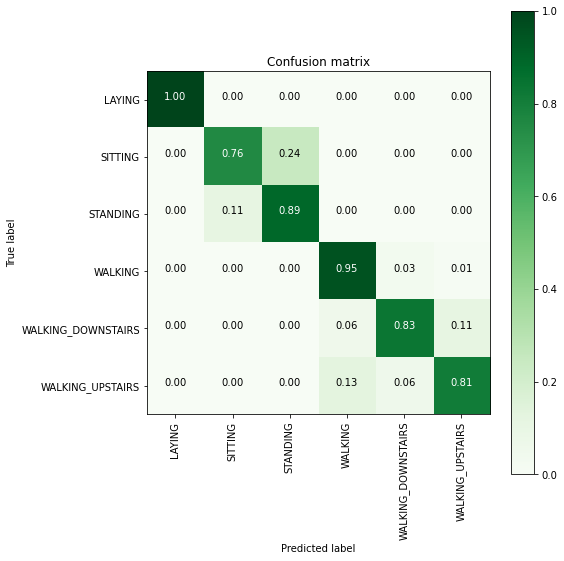

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.88      0.83      0.86       420
  WALKING_UPSTAIRS       0.88      0.81      0.84       471

          accuracy                           0.88      2947
         macro avg       0.88      0.87      0.87      2947
      weighted avg       0.88      0.88      0.88      2947



In [21]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters,n_jobs=-1)
dt_grid_results = perform_model(dt_grid,X_train, y_train, X_test, y_test, class_labels=labels)

In [23]:
print_grid_search_attributes(dt_grid_results['model'])

------------------------------
|   Best Estimator    |
------------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8487579831388707



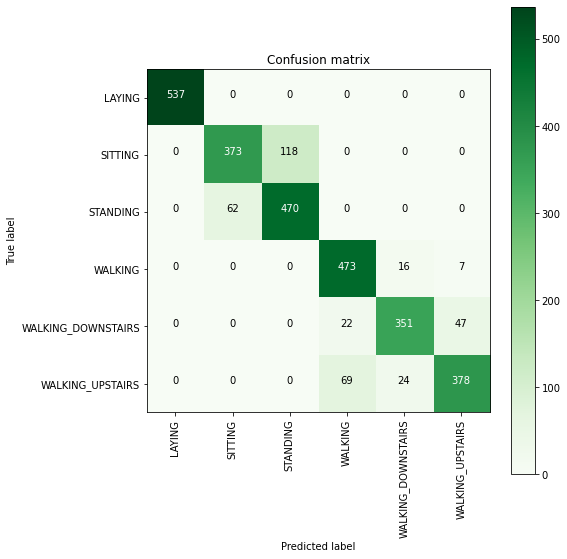

In [24]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

# 5. RandomForest Classifier

training the model...
Done 
 

training_time(HH:MM:SS.ms) - 0:03:12.858115


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.064035


---------------------
|      Accuracy      |
---------------------

    0.9192399049881235


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 430  61   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 478   8  10]
 [  0   0   0  27 349  44]
 [  0   0   0  38   7 426]]


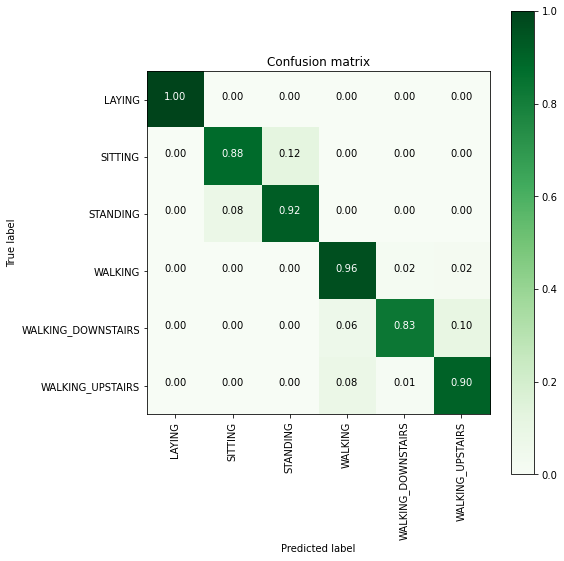

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.88      0.89       491
          STANDING       0.89      0.92      0.90       532
           WALKING       0.88      0.96      0.92       496
WALKING_DOWNSTAIRS       0.96      0.83      0.89       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [22]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,100,15), 'max_depth':np.arange(3,11,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params,n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test,y_test, class_labels=labels)

In [26]:
print_grid_search_attributes(rfc_grid_results['model'])

------------------------------
|   Best Estimator    |
------------------------------

	RandomForestClassifier(max_depth=9, n_estimators=85)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9, 'n_estimators': 85}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9194825122435105



# 6. Comparing all models

In [23]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.86%       4.14%
Linear SVC          : 96.64%       3.359% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 87.78%      12.22% 
Random Forest       : 91.92%      8.076% 
